*EasyOCR 기본 테스트*

+ *https://github.com/JaidedAI/EasyOCR*

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### 1. Settings

In [2]:
import os
import sys

base_dir = "/content/gdrive/MyDrive/Workspace/Colab"
sys.path.append(base_dir)

src_dir = os.path.join(base_dir, "ocr")
%cd $src_dir

/content/gdrive/MyDrive/Workspace/Colab/ocr


In [3]:
!pip install -r requirements.txt > /dev/null

In [4]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()
for file_name, file_content in uploaded.items():
    print(f"File name: {file_name}")

image_files = list(uploaded.keys())

Saving Offline.jpg to Offline.jpg
Saving Online.png to Online.png
Saving Receipt1.jpg to Receipt1.jpg
File name: Offline.jpg
File name: Online.png
File name: Receipt1.jpg


In [44]:
import easyocr
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# 폰트 적용
font_path = '../static/fonts/NanumBarunGothic.ttf'

In [54]:
def draw_text_on_image(src, text, position, font_path, font_size):

    # Pillow로 텍스트 추가
    pil_image = Image.fromarray(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_image)

    # 한글 폰트 설정
    font = ImageFont.truetype(font_path, size=font_size)
    draw.text(position, text, font=font, fill=(255, 0, 0))

    # 결과 이미지 갱신
    return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

In [50]:
reader = easyocr.Reader(['ko','en'], gpu=False)

Processing Offline.jpg: Text Extraction
CPU times: user 1min 10s, sys: 16.6 s, total: 1min 27s
Wall time: 1min 27s


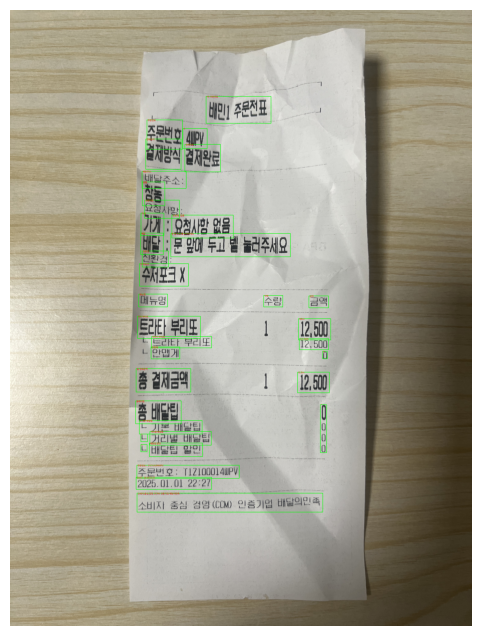

Processing Online.png: Text Extraction
CPU times: user 7.56 s, sys: 674 ms, total: 8.23 s
Wall time: 8.23 s


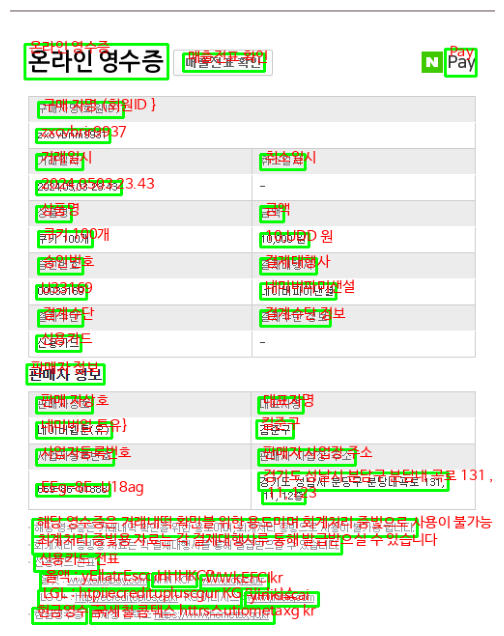

Processing Receipt1.jpg: Text Extraction
CPU times: user 7.21 s, sys: 944 ms, total: 8.16 s
Wall time: 8.23 s


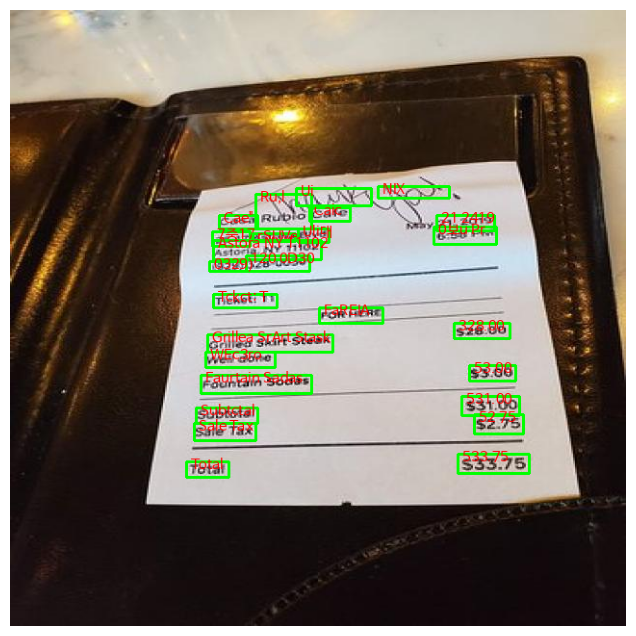

In [56]:
for image_file in image_files:

    try:
        # 파일 읽기
        image = cv2.imread(image_file)
        if image is None:
            continue

        img_height, img_width = image.shape[:2]

        # 이미지에서 텍스트 추출
        print(f"Processing {image_file}: Text Extraction")
        %time results = reader.readtext(image_file)

        # plot
        for (bbox, text, confidence) in results:
            # bbox
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple(map(int, top_left))
            bottom_right = tuple(map(int, bottom_right))

            # draw
            cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
            position = (top_left[0] + 5, top_left[1] - 5)

            image = draw_text_on_image(image, text, position, font_path, 15)


        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

    except ValueError as e:
        print(e)

*GPU나 CPU 모두 가능*

*Apache License 2.0*

*릴리즈 지속적*

*Fine Tuning 해봐야 알듯*